# Cavity Tunning

In [1]:
import os
import phantasy
import scan
import matplotlib.pyplot as plt
%matplotlib inline

## Build high-level lattice based on machine configurations

In [2]:
machine_repo = "/home/tong1/work/FRIB/projects/machines"
machine = os.path.join(machine_repo, "FRIB_FLAME")

In [3]:
mp = phantasy.MachinePortal(machine=machine, segment='LINAC')

/home/tong1/work/FRIB/projects/machines/FRIB_FLAME LINAC


/usr/lib/python2.7/dist-packages/urllib3/connectionpool.py:794: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


## Select cavity needs to be tunned

In [4]:
all_cavities = mp.get_elements(type='CAV')
cav = all_cavities[0]
print(cav)

3 LS1_CA01:CAV1_D1127 CAV 0.2070635 0.24 None None None None (0, 0)


## Get PV names from selected cavity, both set and read types

In [5]:
device_set = str(cav.pv(field='PHA', handle='setpoint')[0])
print(device_set)

VA:LS1_CA01:CAV1_D1127:PHA_CSET


In [6]:
device_read = str(cav.pv(field='PHA', handle='readback')[0])
print(device_read)

VA:LS1_CA01:CAV1_D1127:PHA_RD


## Select monitors downstream, to record readings when cavity is tunning

In [7]:
mp.next_elements(cav, count=10, type='BPM', range='0::1')

[LS1_CA01:BPM_D1129:BPM @ sb=0.511327,
 LS1_CA01:BPM_D1144:BPM @ sb=2.070634,
 LS1_WA01:BPM_D1155:BPM @ sb=3.109095,
 LS1_CA02:BPM_D1163:BPM @ sb=3.884422,
 LS1_CA02:BPM_D1178:BPM @ sb=5.443728,
 LS1_WA02:BPM_D1189:BPM @ sb=6.482189,
 LS1_CA03:BPM_D1196:BPM @ sb=7.257516,
 LS1_CA03:BPM_D1212:BPM @ sb=8.816823,
 LS1_WA03:BPM_D1222:BPM @ sb=9.855284,
 LS1_CB01:BPM_D1231:BPM @ sb=10.762191]

In [8]:
bpm1, bpm2 = mp.next_elements(cav, count=10, type='BPM', range='0::1')[2:5:2]

In [9]:
bpm1, bpm2

(LS1_WA01:BPM_D1155:BPM @ sb=3.109095, LS1_CA02:BPM_D1178:BPM @ sb=5.443728)

## Select all cavities between the selected cavity and the second selected BPM

In [10]:
mp.get_elements(srange=(cav.se, bpm2.sb))

[LS1_CA01:BPM_D1129:BPM @ sb=0.511327,
 LS1_CA01:SOL1_D1131:SOL @ sb=0.643330,
 LS1_CA01:DCH_D1131:HCOR @ sb=0.743330,
 LS1_CA01:DCV_D1131:VCOR @ sb=0.743330,
 LS1_CA01:CAV2_D1135:CAV @ sb=0.986724,
 LS1_CA01:CAV3_D1143:CAV @ sb=1.766370,
 LS1_CA01:BPM_D1144:BPM @ sb=2.070634,
 LS1_CA01:SOL2_D1147:SOL @ sb=2.202637,
 LS1_CA01:DCH_D1147:HCOR @ sb=2.302637,
 LS1_CA01:DCV_D1147:VCOR @ sb=2.302637,
 LS1_CA01:CAV4_D1150:CAV @ sb=2.546031,
 LS1_WA01:BPM_D1155:BPM @ sb=3.109095,
 LS1_CA02:CAV1_D1161:CAV @ sb=3.580158,
 LS1_CA02:BPM_D1163:BPM @ sb=3.884422,
 LS1_CA02:SOL1_D1165:SOL @ sb=4.016425,
 LS1_CA02:DCV_D1165:VCOR @ sb=4.116425,
 LS1_CA02:DCH_D1165:HCOR @ sb=4.116425,
 LS1_CA02:CAV2_D1169:CAV @ sb=4.359819,
 LS1_CA02:CAV3_D1176:CAV @ sb=5.139465,
 LS1_CA02:BPM_D1178:BPM @ sb=5.443728]

In [11]:
cavs_to_turn_off = mp.get_elements(type='CAV', srange=(cav.se, bpm2.sb))

In [12]:
cavs_to_turn_off

[LS1_CA01:CAV2_D1135:CAV @ sb=0.986724,
 LS1_CA01:CAV3_D1143:CAV @ sb=1.766370,
 LS1_CA01:CAV4_D1150:CAV @ sb=2.546031,
 LS1_CA02:CAV1_D1161:CAV @ sb=3.580158,
 LS1_CA02:CAV2_D1169:CAV @ sb=4.359819,
 LS1_CA02:CAV3_D1176:CAV @ sb=5.139465]

## Get PV names (phase and amplitude) of these cavities, save present settings then shut them off

In [13]:
cavs_pv_amp = [str(c.pv(field='AMP', handle='setpoint')[0]) for c in cavs_to_turn_off]
cavs_pv_pha = [str(c.pv(field='PHA', handle='setpoint')[0]) for c in cavs_to_turn_off]

In [14]:
cavs_settings0 = phantasy.caget(cavs_pv_amp + cavs_pv_pha)

In [15]:
cavs_settings0

[0.7, 0.76, 0.82, 0.88, 0.94, 1.0, 325.0, 325.0, 325.0, 325.0, 325.0, 325.0]

## set them to 0

In [16]:
phantasy.caput(cavs_pv_amp + cavs_pv_pha, [0.0]*len(cavs_pv_amp+cavs_pv_pha), wait=True)

[cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing(),
 cothread.catools.ca_nothing()]

## Setup scan task

Scan tasks are globally managed by SCAN SERVER, what the users have to do is create task by using classes from ``phantasy``, then submit to SERVER. Scan procedure state could be checked interactively in python terminal or in Scan Monitor of CSS; SCAN SERVER also can respond specific request comes from scan client, i.e. python terminal or CSS.

### Save initial settings of cavity

In [17]:
device_set_setting0 = phantasy.caget(device_set)

In [18]:
print(device_set_setting0)

325.0


### Prepare PV names so as to record readings when scan routine is processing

In [19]:
log_devices = [str(bpm1.pv(field='PHA', handle='readback')[0]), str(bpm2.pv(field='PHA', handle='readback')[0]),
               str(bpm1.pv(field='ENG', handle='readback')[0]), str(bpm2.pv(field='ENG', handle='readback')[0]),
               device_read]

In [20]:
print(log_devices)

['VA:LS1_WA01:BPM_D1155:PHA_RD', 'VA:LS1_CA02:BPM_D1178:PHA_RD', 'VA:LS1_WA01:BPM_D1155:ENG_RD', 'VA:LS1_CA02:BPM_D1178:ENG_RD', 'VA:LS1_CA01:CAV1_D1127:PHA_RD']


### Build one-dimensional scan task

In [21]:
scantask = phantasy.ScanClient1D()

In [22]:
scantask

ScanClient1D at http://localhost:4810

In [23]:
scantask.device_set = device_set
scantask.device_read = device_read
scantask.log_devices = log_devices
scantask.timeout = 5.0
scantask.tolerance = 0.5
scantask.scan_start = 0.0
scantask.scan_stop = 360.0
scantask.scan_step = 10.0
scantask.delay = 1.0
scantask.n_sample = 5
scantask.name = 'Cavity Tunning Demo'

scantask.pre_scan = []
post_cmds = [scan.Set(device_set, device_set_setting0)]
for k,v in zip(cavs_pv_amp + cavs_pv_pha, cavs_settings0):
    post_cmds.append(scan.Set(k, v))
scantask.post_scan = post_cmds

scantask.build_scan(completion=True)

[Set('VA:LS1_CA01:CAV1_D1127:PHA_CSET', 0.0, completion=True, readback='VA:LS1_CA01:CAV1_D1127:PHA_RD', timeout=5.0),
 Loop('VA:LS1_CA01:CAV1_D1127:PHA_CSET', 0, 360, 10, [ Loop('loc://i(0)', 1, 5, 1, [ Delay(1), Log('VA:LS1_WA01:BPM_D1155:PHA_RD', 'VA:LS1_CA02:BPM_D1178:PHA_RD', 'VA:LS1_WA01:BPM_D1155:ENG_RD', 'VA:LS1_CA02:BPM_D1178:ENG_RD', 'VA:LS1_CA01:CAV1_D1127:PHA_RD', 'loc://i(0)') ]) ], completion=True, readback='VA:LS1_CA01:CAV1_D1127:PHA_RD', tolerance=0.5, timeout=5),
 Set('VA:LS1_CA01:CAV1_D1127:PHA_CSET', 325.0),
 Set('VA:LS1_CA01:CAV2_D1135:AMPL_CSET', 0.7),
 Set('VA:LS1_CA01:CAV3_D1143:AMPL_CSET', 0.76),
 Set('VA:LS1_CA01:CAV4_D1150:AMPL_CSET', 0.82),
 Set('VA:LS1_CA02:CAV1_D1161:AMPL_CSET', 0.88),
 Set('VA:LS1_CA02:CAV2_D1169:AMPL_CSET', 0.94),
 Set('VA:LS1_CA02:CAV3_D1176:AMPL_CSET', 1.0),
 Set('VA:LS1_CA01:CAV2_D1135:PHA_CSET', 325.0),
 Set('VA:LS1_CA01:CAV3_D1143:PHA_CSET', 325.0),
 Set('VA:LS1_CA01:CAV4_D1150:PHA_CSET', 325.0),
 Set('VA:LS1_CA02:CAV1_D1161:PHA_CSET'

In [24]:
#print(scantask.simulate_scan())

### submit task

In [25]:
scantask.submit_scan()

54

In [26]:
print(scantask)

'Cavity Tunning Demo' [54]: Running, 0 %


#### Data visualization

In [32]:
scan_id = 54
n = 5
client = phantasy.ScanClient1D()

In [33]:
scandata = client.get_data(scan_id, n)

In [34]:
scandata.get_all_names()

['VA:LS1_CA01:CAV1_D1127:PHA_RD',
 'loc://i(0)',
 'VA:LS1_WA01:BPM_D1155:ENG_RD',
 'VA:LS1_WA01:BPM_D1155:PHA_RD',
 'VA:LS1_CA02:BPM_D1178:ENG_RD',
 'VA:LS1_CA02:BPM_D1178:PHA_RD']

In [37]:
ks = scandata.get_all_names()                                               
idx = 4                                                                  
mean_data1= scandata.get_average(ks[0])                                    
mean_data2 = scandata.get_average(ks[idx])                                  
std_data1 = scandata.get_errorbar(ks[0])                                    
std_data2 = scandata.get_errorbar(ks[idx]) 

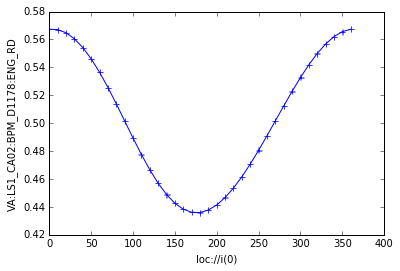

In [38]:
fig = plt.figure()                                                             
ax = fig.add_subplot(111)                                                      
ebplt = ax.errorbar(mean_data1, mean_data2, xerr=std_data1, yerr=std_data2)
ax.set_xlabel(ks[1])                                                           
ax.set_ylabel(ks[idx]) 